# Import necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift
pi = np.pi

# Task 1: 1D Fourier Transform

Define a function $2\cos(2\pi f_1n) + 3\cos(2\pi f_2n)$

In [10]:

f1 = 0.3 
f2 = 0.2 
N = 100
n= np.arange(N)
x = 2*np.cos(2*np.pi*f1*n) + 3*np.cos(2*np.pi*f2*n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


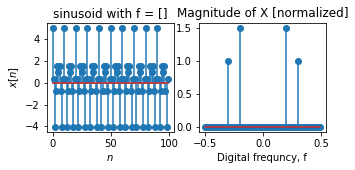

In [11]:
def perform_fft(x, N):
    X = fft(x)
    X = fftshift(X)
    X = X/N # Normalization
    
    fk = fftfreq(N)
    fk = fftshift(fk)
    
    return X, fk

def plot_sig_and_fft(x, n, X, fk, f):
    fig = plt.figure(figsize=(5, 2))

    plt.subplot(1, 2, 1)
    plt.stem(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"sinusoid with f = {f}")

    plt.subplot(1, 2, 2)
    plt.stem(fk, np.abs(X))
    plt.xlabel("Digital frequncy, f")
    plt.title("Magnitude of X [normalized]")
     
# perform the fourier transform of the signal
# plot the signal and it's fourier magnitude spectrum side by side

X , fk= perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, []) 

# Task 2: IFFT

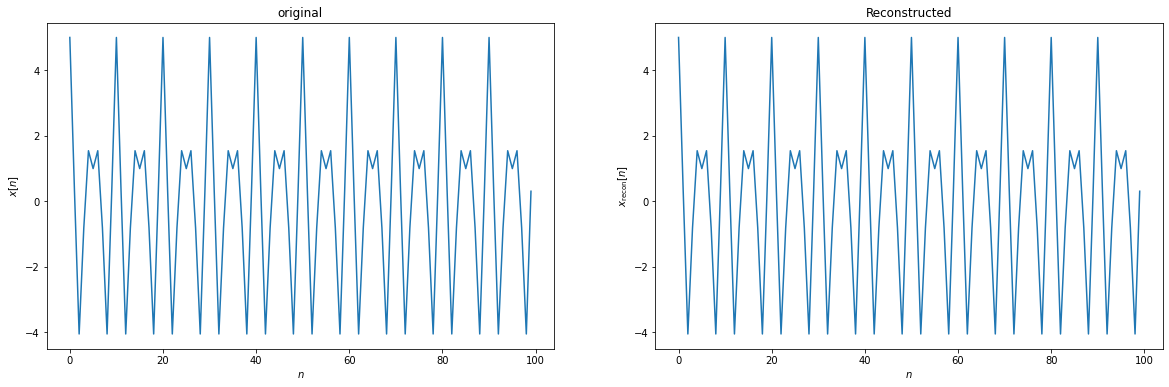

In [12]:
def perform_ifft(X, N):
    X_ishift = ifftshift(X)
    x_recon = ifft(X_ishift)
    x_recon = np.real(x_recon)*N
    
    n = np.arange(N)
    if x_recon.shape[0] > N:
        x_recon = x_recon[:N]
    
    return x_recon, n

# performt the inverse fourier transform of X
# plot the original signal and the recosntructed signal side by side
x_recon, n_recon = perform_ifft(X, N)

fig = plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"original")

plt.subplot(1, 2, 2)
plt.plot(n_recon, x_recon)
plt.xlabel("$n$")
plt.ylabel("$x_{\mathrm{recon}}[n]$")
plt.title("Reconstructed")
plt.show()

# Task 3: Changing resolution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


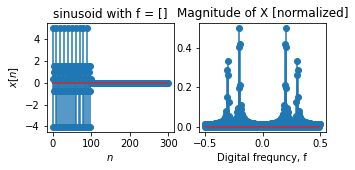

In [13]:
# perform fourier transform of x again, but this time triple the frequency resolution
# plot the signal and it's fourier magnitude spectrum side by side

n_zeros = 200
x_padded = np.concatenate([x, np.zeros(n_zeros)])
X_high_res = np.concatenate([n, np.arange(N, N+n_zeros)])

X, fk= perform_fft(x_padded, N+n_zeros)
plot_sig_and_fft(x_padded, X_high_res, X, fk, [])